<a href="https://colab.research.google.com/github/s-choung/CCEL_Multiscale/blob/main/oc20_her_data_inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and untar files
!wget https://dl.fbaipublicfiles.com/opencatalystproject/data/oc20_data_mapping.pkl
!wget https://dl.fbaipublicfiles.com/opencatalystproject/data/mapping_adslab_slab.pkl
!wget https://dl.fbaipublicfiles.com/opencatalystproject/data/oc22/oc20_ref.pkl
!wget https://dl.fbaipublicfiles.com/opencatalystproject/data/per_adsorbate_is2res/1.tar

--2023-09-26 00:59:45--  https://dl.fbaipublicfiles.com/opencatalystproject/data/oc20_data_mapping.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.248.127, 65.8.248.22, 65.8.248.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.248.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192493497 (184M) [application/octet-stream]
Saving to: ‘oc20_data_mapping.pkl’

oc20_data_mapping.p 100%[===================>] 183.58M  27.1MB/s    in 7.4s    

2023-09-26 00:59:53 (24.7 MB/s) - ‘oc20_data_mapping.pkl’ saved [192493497/192493497]

--2023-09-26 00:59:53--  https://dl.fbaipublicfiles.com/opencatalystproject/data/mapping_adslab_slab.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.248.127, 65.8.248.22, 65.8.248.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.248.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43115623 (41M) [application/octet-

In [ ]:
!tar -xvf 1.tar
!pip install ase

Streaming output truncated to the last 5000 lines.
1/1/random1288602.extxyz.xz
1/1/random507498.extxyz.xz
1/1/random765115.extxyz.xz
1/1/random1598803.extxyz.xz
1/1/random1089693.extxyz.xz
1/1/random1131196.extxyz.xz
1/1/random581734.extxyz.xz
1/1/random979953.extxyz.xz
1/1/random971859.extxyz.xz
1/1/random1856530.extxyz.xz
1/1/random2071530.extxyz.xz
1/1/random2436716.extxyz.xz
1/1/random1159592.extxyz.xz
1/1/random1132917.extxyz.xz
1/1/random1540673.extxyz.xz
1/1/random1039244.extxyz.xz
1/1/random2109613.extxyz.xz
1/1/random1088511.extxyz.xz
1/1/random1816273.extxyz.xz
1/1/random679472.extxyz.xz
1/1/random1448733.extxyz.xz
1/1/random464021.extxyz.xz
1/1/random1789609.extxyz.xz
1/1/random1409504.extxyz.xz
1/1/random2359963.extxyz.xz
1/1/random1174800.extxyz.xz
1/1/random577785.extxyz.xz
1/1/random1822233.extxyz.xz
1/1/random1521664.extxyz.xz
1/1/random2081841.extxyz.xz
1/1/random1292481.extxyz.xz
1/1/random1982410.extxyz.xz
1/1/random524425.extxyz.xz
1/1/random897139.extxyz.xz
1/1/ran

In [ ]:
import os
from tqdm import tqdm

# Directory containing the txt.xz files
directory = "/content/1/1/"

files = os.listdir(directory)
total_files = len(files)

# Iterate through the files with a progress bar
for filename in tqdm(files, desc="Extracting Files", total=total_files):
    if filename.endswith(".extxyz.xz"):
        file_path = os.path.join(directory, filename)

        # Use the xz command-line tool to extract the file
        extracted_file = file_path.replace(".xz", "")
        !xz -d "$file_path"

        # Calculate and print the number of files left
        files_left = total_files - files.index(filename)

        # Remove the extracted file if desired
        # os.remove(extracted_file)


Extracting Files: 100%|██████████| 12829/12829 [23:01<00:00,  9.29it/s]


In [ ]:
!pip install ase

In [ ]:
tqdm.pandas()
df2=pd.read_csv('/content/1/system.txt',header=None)
df2.columns=['id','ref_energy']
df2

,id,ref_energy
0,random1719469,-199.649686
1,random1252132,-3.659161
2,random2138036,-200.268546
3,random1902440,-694.314144
4,random1165257,-365.130933
...,...,...
12824,random530919,-125.728971
12825,random1186723,-647.317092
12826,random1195721,-214.334717
12827,random1531992,-224.902900


In [ ]:
!pip install ase

In [ ]:
!ase --version

ase-3.22.1


In [ ]:
from ase.io import read
import pandas as pd

#merged_df = pd.merge(df2, df_ref, on='id')

# Rename the 'energy' columns to 'energy_tot' and 'energy_ref'
#merged_df = merged_df.rename(columns={'energy_x': 'energy_tot', 'energy_y': 'energy_ref'})


def get_energy(id=''):
   path='/content/1/1/'+id+'.extxyz'
   traj = ase.io.read(path, ":")
   return traj[-1].get_total_energy()

#Take 10 examples as progress apply will take time
df2['get_energy']=df2['id'].progress_apply(lambda x:get_energy(x))

df2['adsorp_energy']=df2['get_energy']-df2['ref_energy']


print (df2)


100%|██████████| 12829/12829 [19:15<00:00, 11.10it/s]

                  id  ref_energy  get_energy  adsorp_energy
0      random1719469 -199.649686 -200.409636      -0.759951
1      random1252132   -3.659161   -1.796714       1.862448
2      random2138036 -200.268546 -200.263041       0.005505
3      random1902440 -694.314144 -694.844953      -0.530809
4      random1165257 -365.130933 -365.237914      -0.106981
...              ...         ...         ...            ...
12824   random530919 -125.728971 -125.977745      -0.248774
12825  random1186723 -647.317092 -647.725346      -0.408254
12826  random1195721 -214.334717 -213.526917       0.807800
12827  random1531992 -224.902900 -224.739562       0.163338
12828  random1556636 -333.864151 -334.174066      -0.309915

[12829 rows x 4 columns]


In [ ]:
df2

,id,ref_energy,get_energy,adsorp_energy
0,random1719469,-199.649686,-200.409636,-0.759951
1,random1252132,-3.659161,-1.796714,1.862448
2,random2138036,-200.268546,-200.263041,0.005505
3,random1902440,-694.314144,-694.844953,-0.530809
4,random1165257,-365.130933,-365.237914,-0.106981
...,...,...,...,...
12824,random530919,-125.728971,-125.977745,-0.248774
12825,random1186723,-647.317092,-647.725346,-0.408254
12826,random1195721,-214.334717,-213.526917,0.807800
12827,random1531992,-224.902900,-224.739562,0.163338


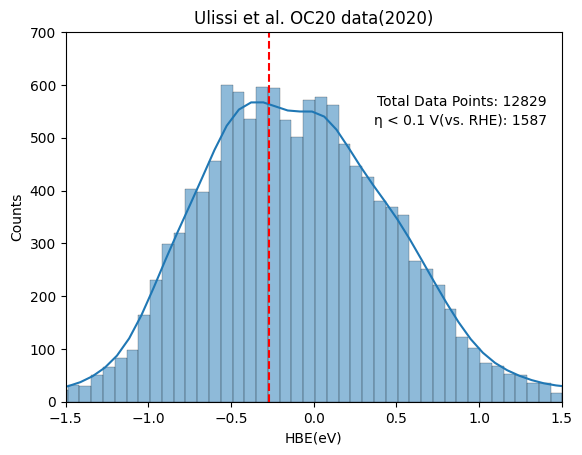

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.histplot(df2['adsorp_energy'], kde=True)  # Create a histogram with a KDE (Kernel Density Estimation) curve

# Set x-axis limits to -1 and 1
plt.xlim(-1.5, 1.5)
plt.xlim(-1.5, 1.5)
plt.ylim(0, 700)

# Add a vertical line at x = -0.27
plt.axvline(x=-0.27, color='red', linestyle='--')

# Count the total number of data points
total_data_points = len(df2)

# Count the number of |adsorp_energy + 0.27| < 0.1
count_eta = len(df2[abs(df2['adsorp_energy'] + 0.27) < 0.1])

# Add text at the upper right position for total data points
plt.text(0.97, 0.8, f'Total Data Points: {total_data_points}', transform=plt.gca().transAxes, fontsize=10, ha='right')

# Add text at the upper right position for η < 0.1 VRHE
plt.text(0.97, 0.75, f'η < 0.1 V(vs. RHE): {count_eta}', transform=plt.gca().transAxes, fontsize=10, ha='right')

plt.xlabel('HBE(eV)')
plt.ylabel('Counts')
plt.title('Ulissi et al. OC20 data(2020)')
plt.show()


In [ ]:
import pickle

# Define the path to the downloaded pickle file
pickle_file_path = "oc20_data_mapping.pkl"

# Read the contents of the pickle file
try:
    with open(pickle_file_path, 'rb') as file:a
        data = pickle.load(file)

    first_100_entries = list(data.items())[:100]
    for key, value in first_100_entries:
        print(f'Key: {key}, Value: {value}')
    total_entries = len(data)
    print(f"Total number of entries: {total_entries}")

except Exception as e:
    print("Error reading pickle file:", str(e))
# Initialize an empty list to store the keys
samples = []

# Limit the search to the first 5000 entries
for key, value in list(data.items())[:100]:
    # Check if 'ads_symbols' is '*H'
    if value['ads_symbols'] == '*H':
        # Append the key to the samples list
        samples.append(key)
        # Print the desired information
        print(f'Key: {key}, Bulk Symbols: {value["bulk_symbols"]}, Ads Symbols: {value["ads_symbols"]}, miller_index: {value["miller_index"]}, class: {value["class"]}')

# Print the list of keys
print("Keys with 'ads_symbols' equal to '*H' in the oc20:")
print("number of entry",len(samples))
